# Statistics for Machine Learning & Data Science - Week 2 - Loaded Dice

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


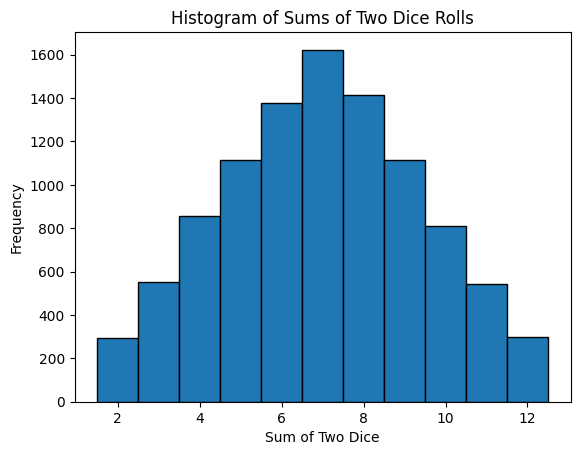

In [2]:
dice = [i for i in range(1,7)]
RUNS = 10000
sums = []

for i in range(0, RUNS):
    throw_1_of_2 = np.random.choice(dice)
    throw_2_of_2 = np.random.choice(dice)
    sums.append(throw_1_of_2 + throw_2_of_2)

sums_df = pd.DataFrame(data=sums, columns=["sum"])

sums_df.hist(bins=np.arange(1.5, 13.5, 1), edgecolor="black", grid=False)

plt.xlabel("Sum of Two Dice")
plt.ylabel("Frequency")
plt.title("Histogram of Sums of Two Dice Rolls")

plt.show()

<Axes: ylabel='Count'>

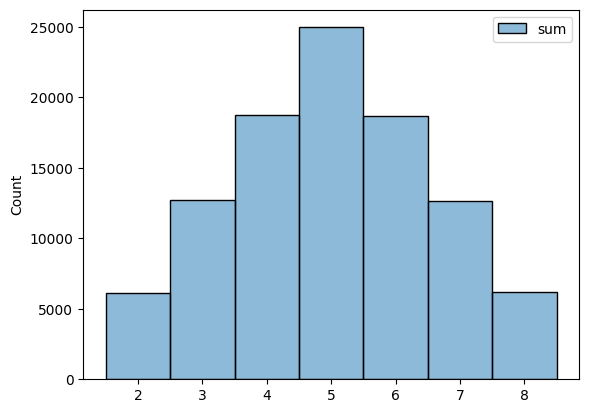

In [3]:
dice = [i for i in range(1, 5)]
RUNS = 100000
sums = []
rolls = []

for i in range(0, RUNS):
    throw_1_of_2 = np.random.choice(dice)
    rolls.append(throw_1_of_2)
    throw_2_of_2 = np.random.choice(dice)
    rolls.append(throw_2_of_2)
    sums.append(throw_1_of_2 + throw_2_of_2)

rolls_df = pd.DataFrame(data=rolls, columns=["roll"])
sums_df = pd.DataFrame(data=sums, columns=["sum"])

sns.histplot(data=sums_df, bins=np.arange(1.5, 9.5, 1), edgecolor="black", discrete=True)

<Axes: ylabel='Count'>

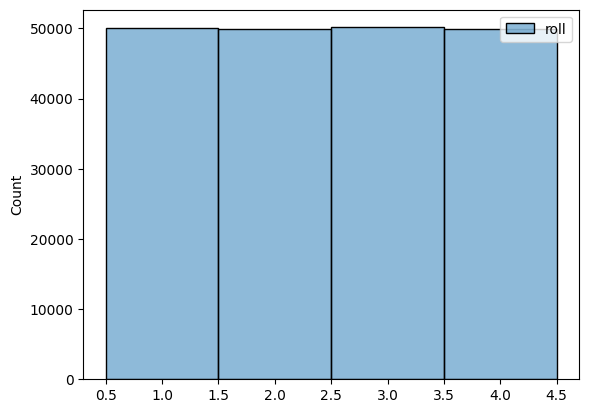

In [4]:
sns.histplot(data=rolls_df, bins=np.arange(0.5, 5.5, 1), edgecolor="black", discrete=True)

In [5]:
p_2_or_8 = np.where((sums_df["sum"] == 2) | (sums_df["sum"] == 8))[0].size / RUNS /2
p_2_or_8

0.06143

In [6]:
p_3_or_7 = np.where((sums_df["sum"] == 3) | (sums_df["sum"] == 7))[0].size / RUNS / 2
p_3_or_7

0.126945

In [7]:
p_4_or_6 = np.where((sums_df["sum"] == 4) | (sums_df["sum"] == 6))[0].size / RUNS / 2
p_4_or_6

0.186835

In [8]:
p_5 = np.where((sums_df["sum"] == 5))[0].size / RUNS
p_5

0.24958

In [9]:
mean = np.mean(sums)
std = np.std(sums)
print(f"mean: {mean} | std: {std}")

mean: 4.99945 | std: 1.5795473077752373


In [10]:
first_rolls = rolls_df[rolls_df.index % 2 == 0]
second_rolls = rolls_df[rolls_df.index % 2 == 1]

cov = np.cov(first_rolls["roll"], second_rolls["roll"])[0][1]
cov

-0.0013450758507585975

In [17]:
def gen_loaded_die_probs(n: int, doubled_side: int) -> tuple[list[int], list[float]]:
    base_prob = 1/(n+1)
    doubled_prob = 2*base_prob
    probs = [base_prob for _ in range(1, n+1)]
    probs[doubled_side-1] = doubled_prob
    die = [i for i in range(1, n+1)]
    return die, probs



die, probs = gen_loaded_die_probs(6, 3)

RUNS = 10000
rolls = np.zeros(RUNS)
for i in range(0, RUNS):
    roll = np.random.choice(die, p=probs)
    rolls[i] = roll


In [18]:
mean = np.mean(rolls)
std = np.std(rolls)
print(f"mean: {mean} | std: {std}")

mean: 3.4274 | std: 1.592522916632599


In [20]:
threes = np.where(rolls == 3)[0].size / RUNS
threes

0.2898

In [23]:
sum = np.zeros(RUNS)
for i in range(0, RUNS):
    sum[i] = np.random.choice(die, p=probs) + np.random.choice(die, p=probs)

In [24]:
sorted = np.sort(sum)
cdf = np.arange(1, RUNS+1) / RUNS
cdf

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 9.998e-01, 9.999e-01,
       1.000e+00])

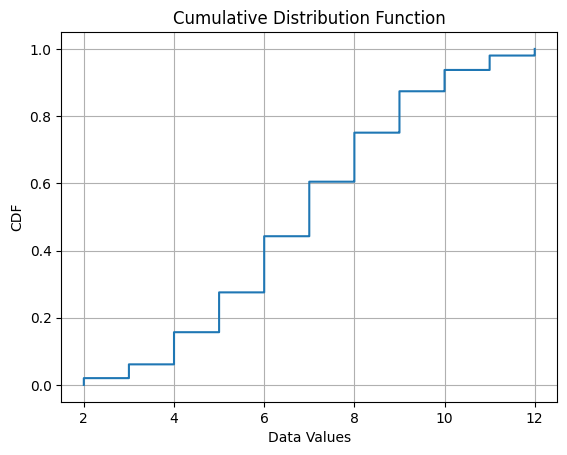

In [26]:
plt.step(sorted, cdf, where="post")
plt.xlabel("Data Values")
plt.ylabel("CDF")
plt.title("Cumulative Distribution Function")
plt.grid(True)
plt.show()